# **YOLOv8 on Irish Sign Language Dataset**
## Before Running the Script Please Make Sure you have selected the Run Time as GPU

In [1]:
!nvidia-smi

Fri Aug 16 09:40:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Step 01: Install dependencies and Import libraries -Install YOLOv8

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image


### Step 02: Download data from roboflow universe

Note: The custom data has to be processed using roboflow workspace in yolov8 format.

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kUi8mij0tVzjhKLSRGxS")
project = rf.workspace("minuucd").project("signlanguage-final")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SignLanguage-Final-3 in yolov8:: 100%|██████████| 2018/2018 [00:00<00:00, 6773.70it/s]


### Step 03: Training the custom data

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 123MB/s]
New https://pypi.org/project/ultralytics/8.2.78 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/SignLanguage-Final-3/data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, st

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1723801381.25158c461c63.2730.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1060.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1061.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1062.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


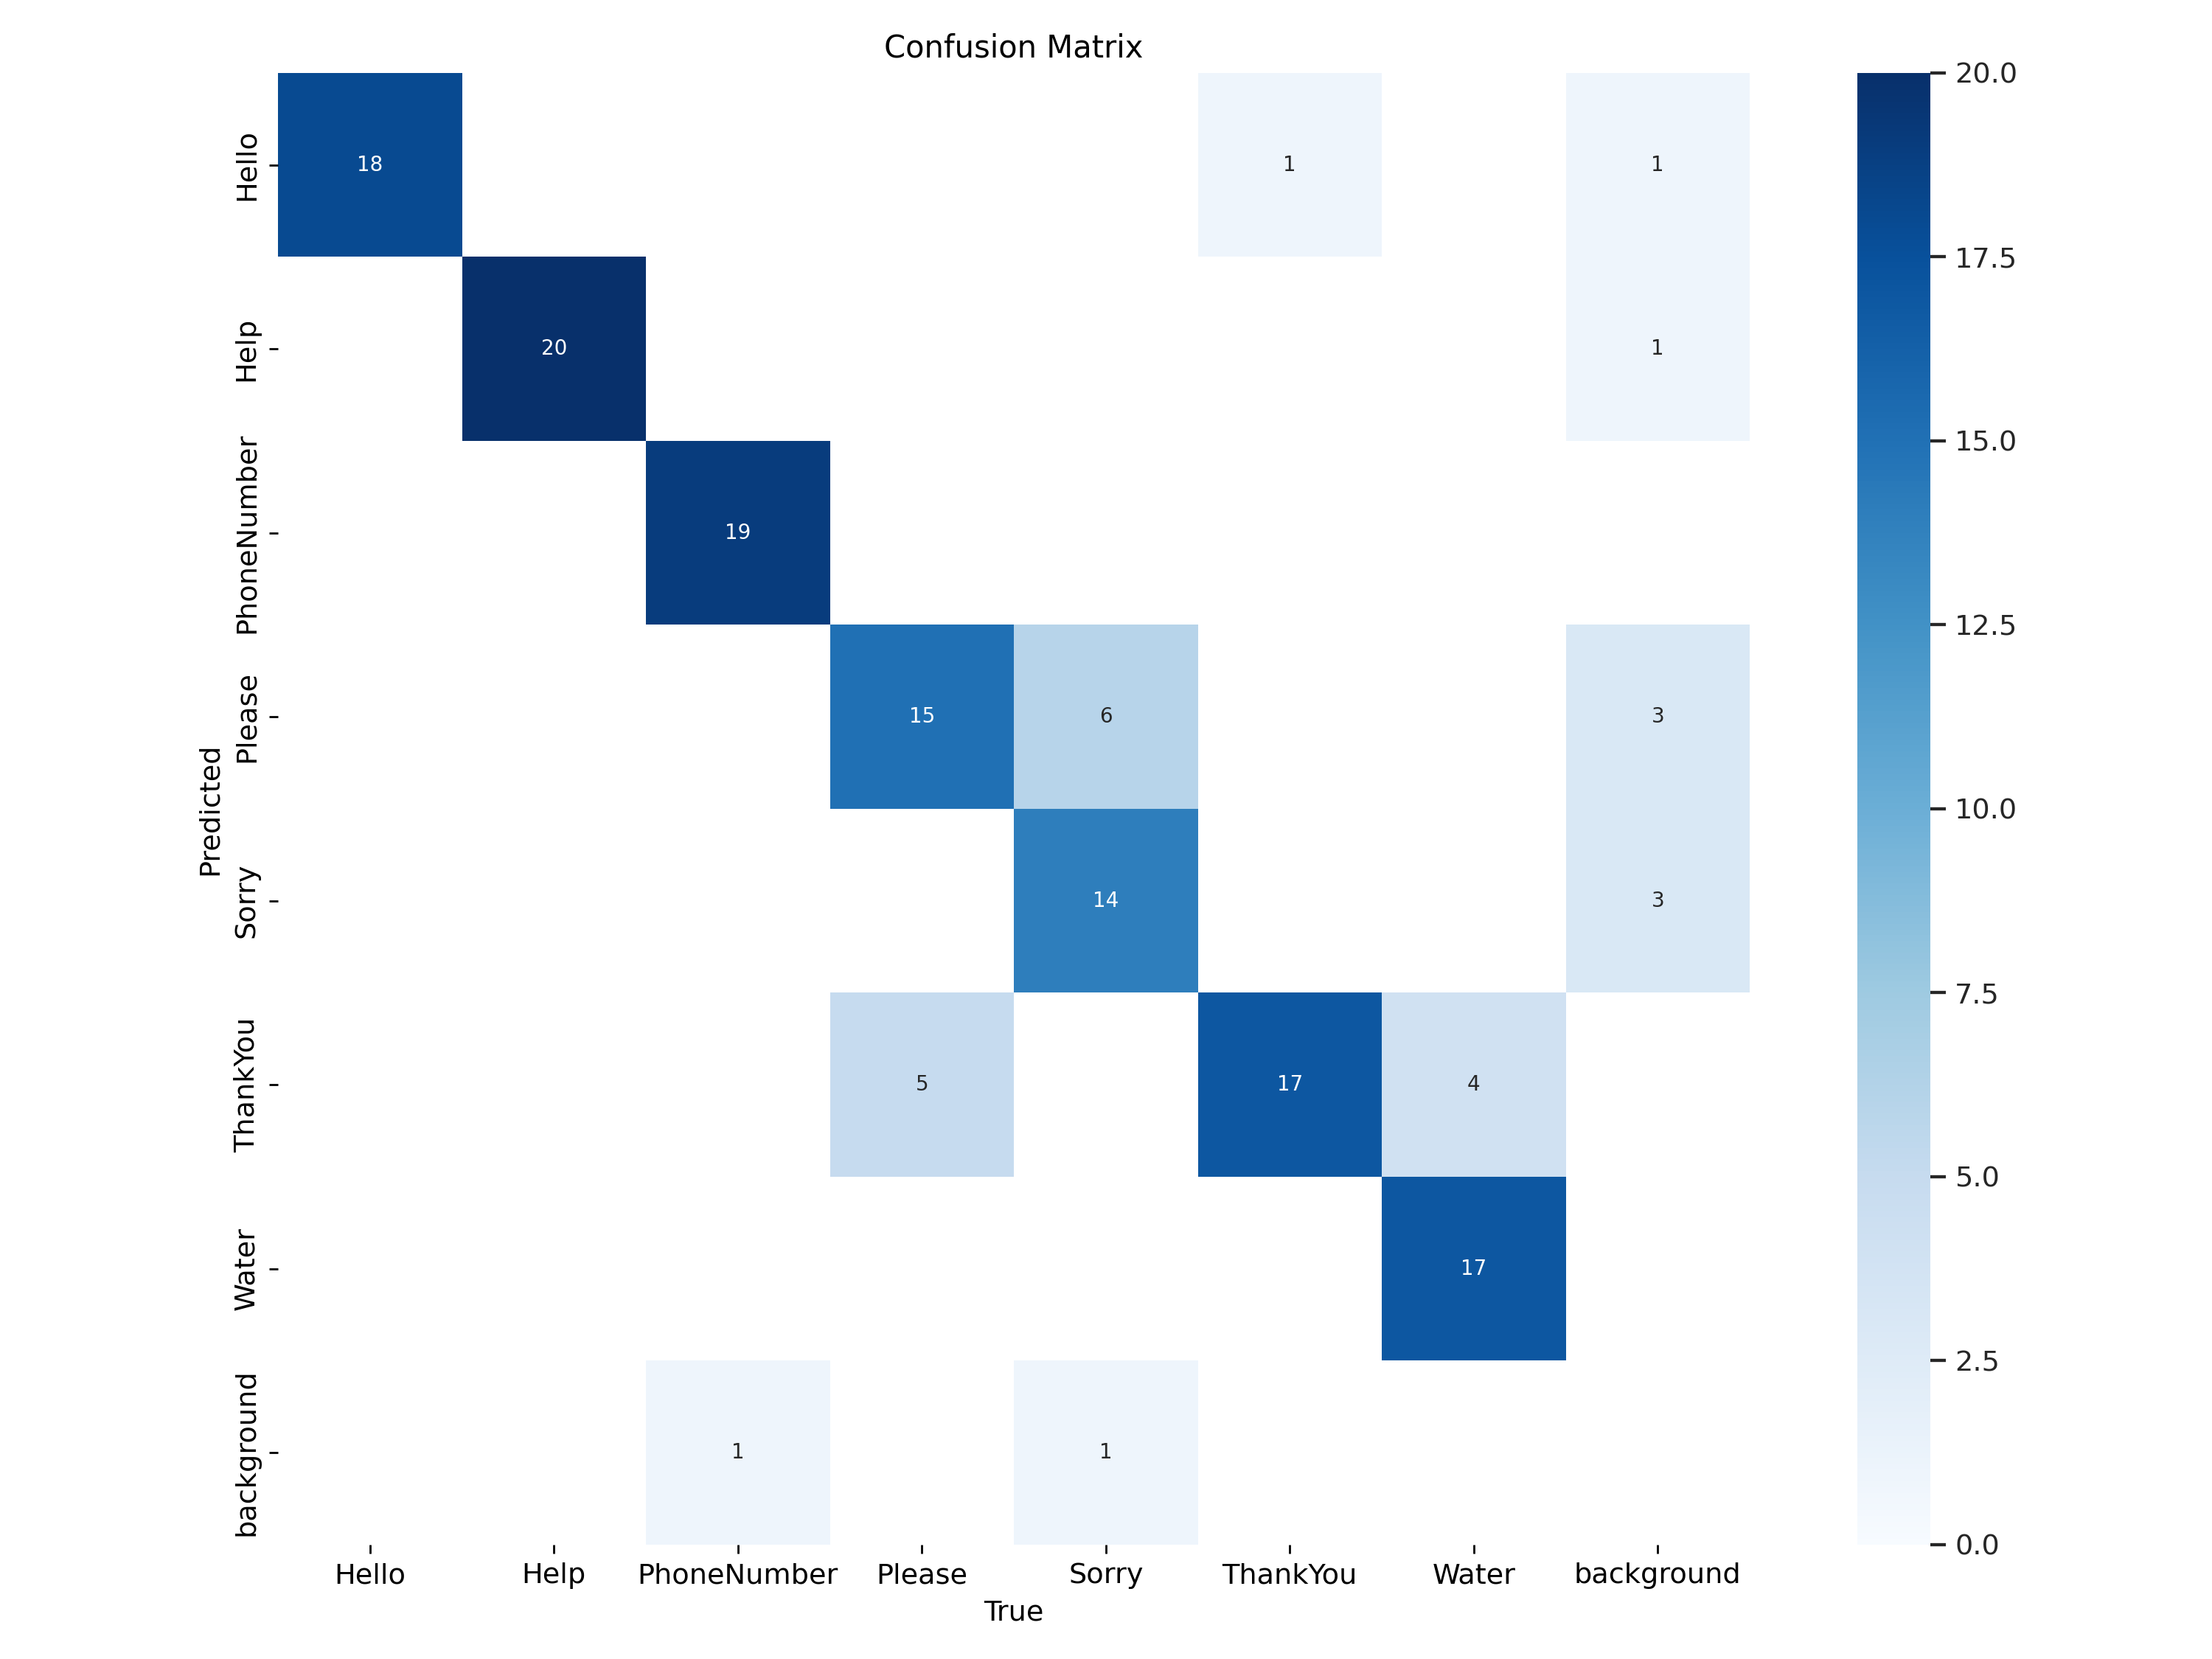

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


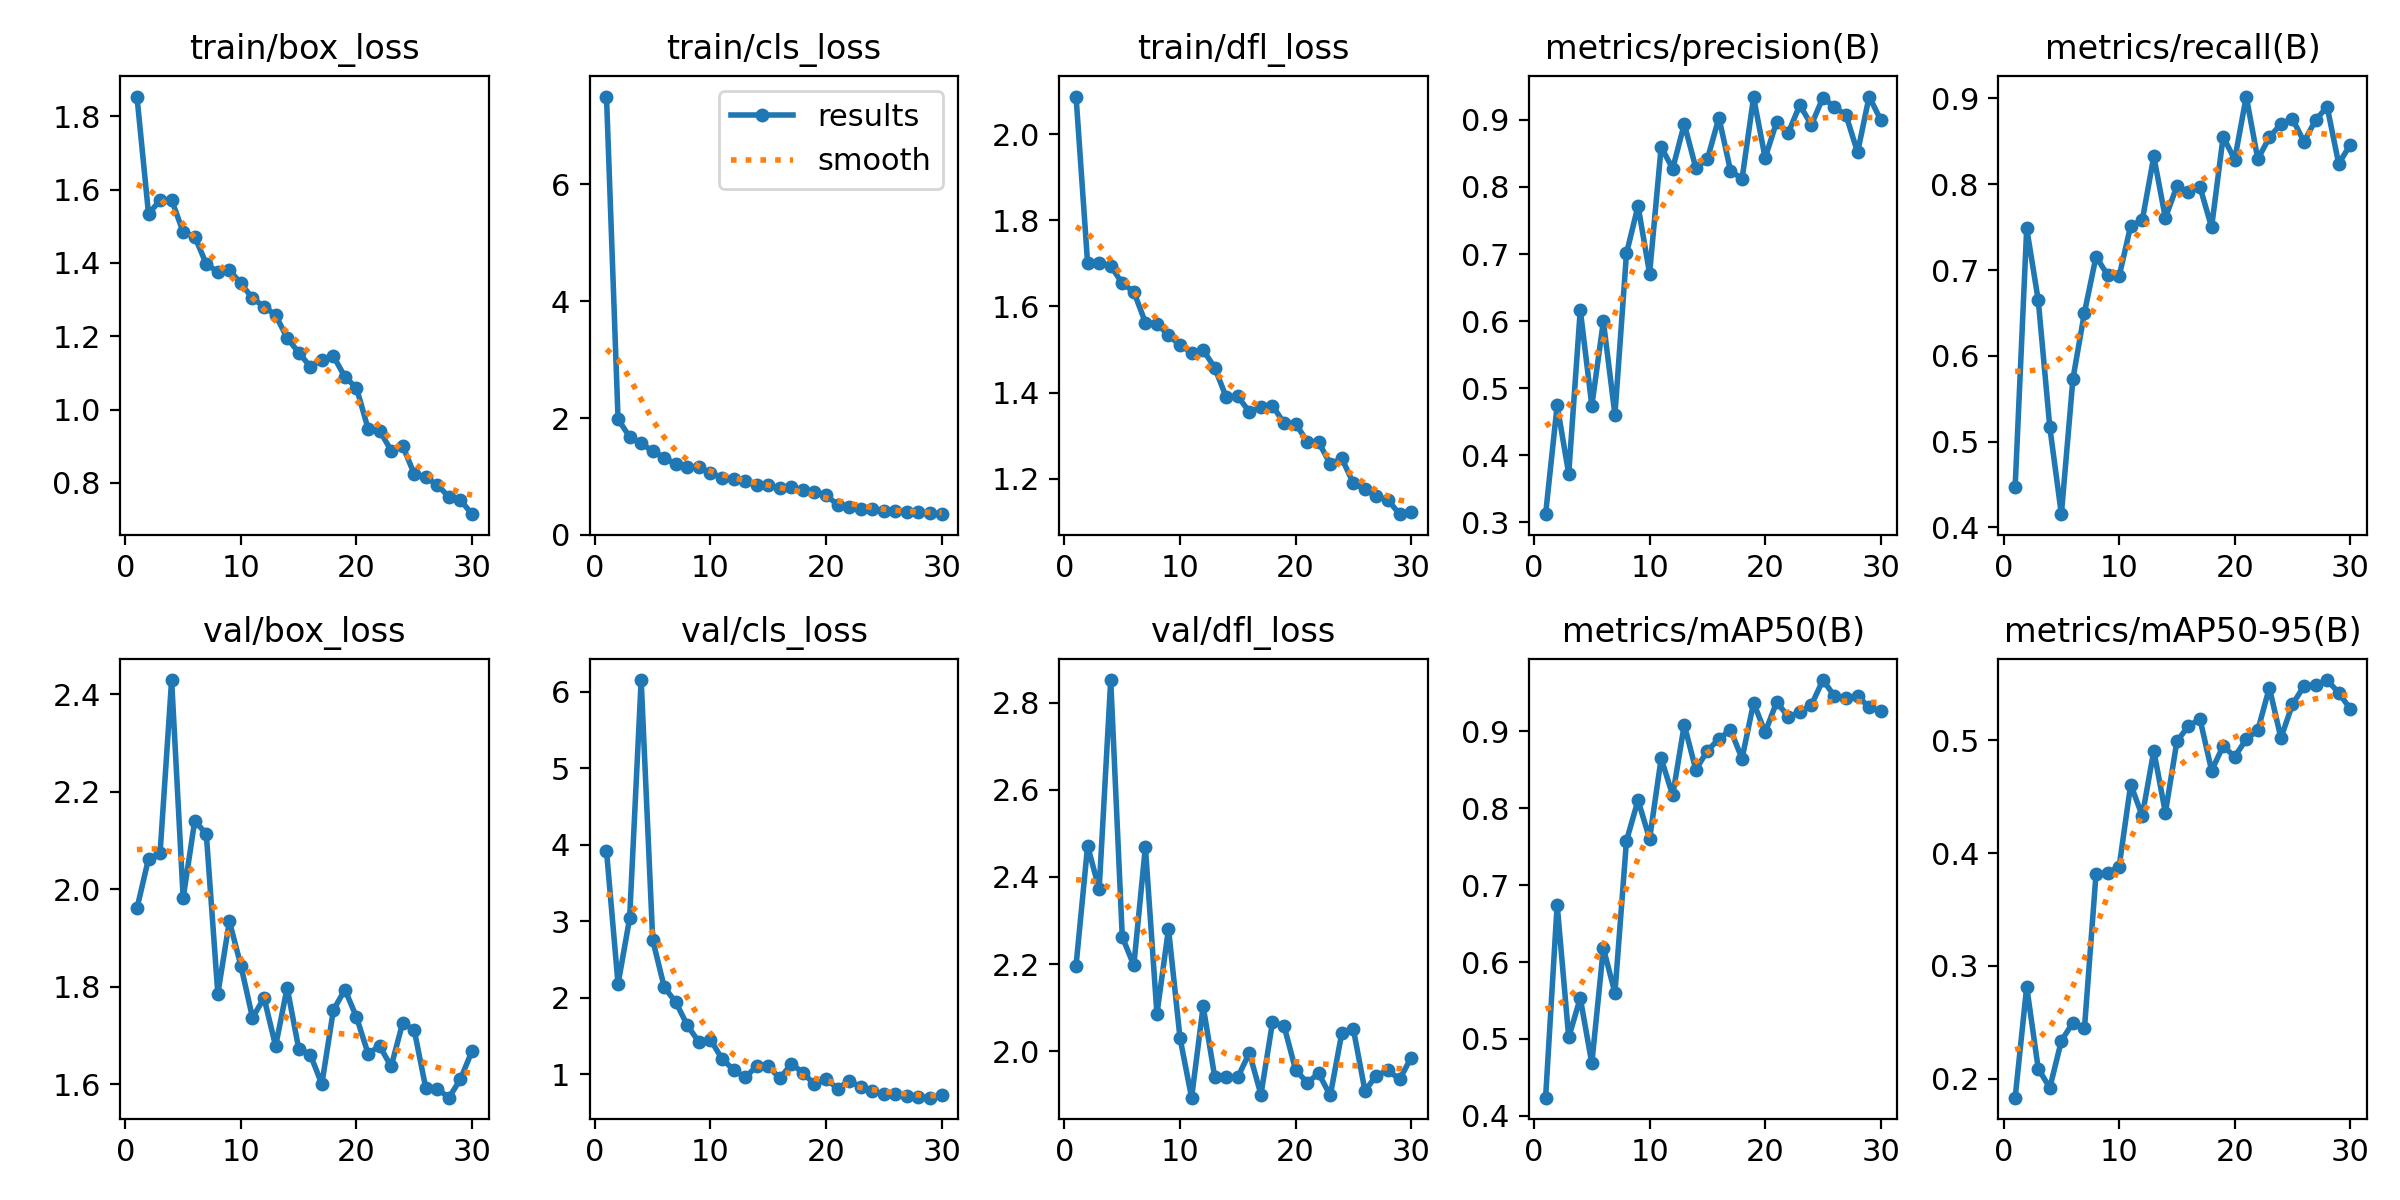

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


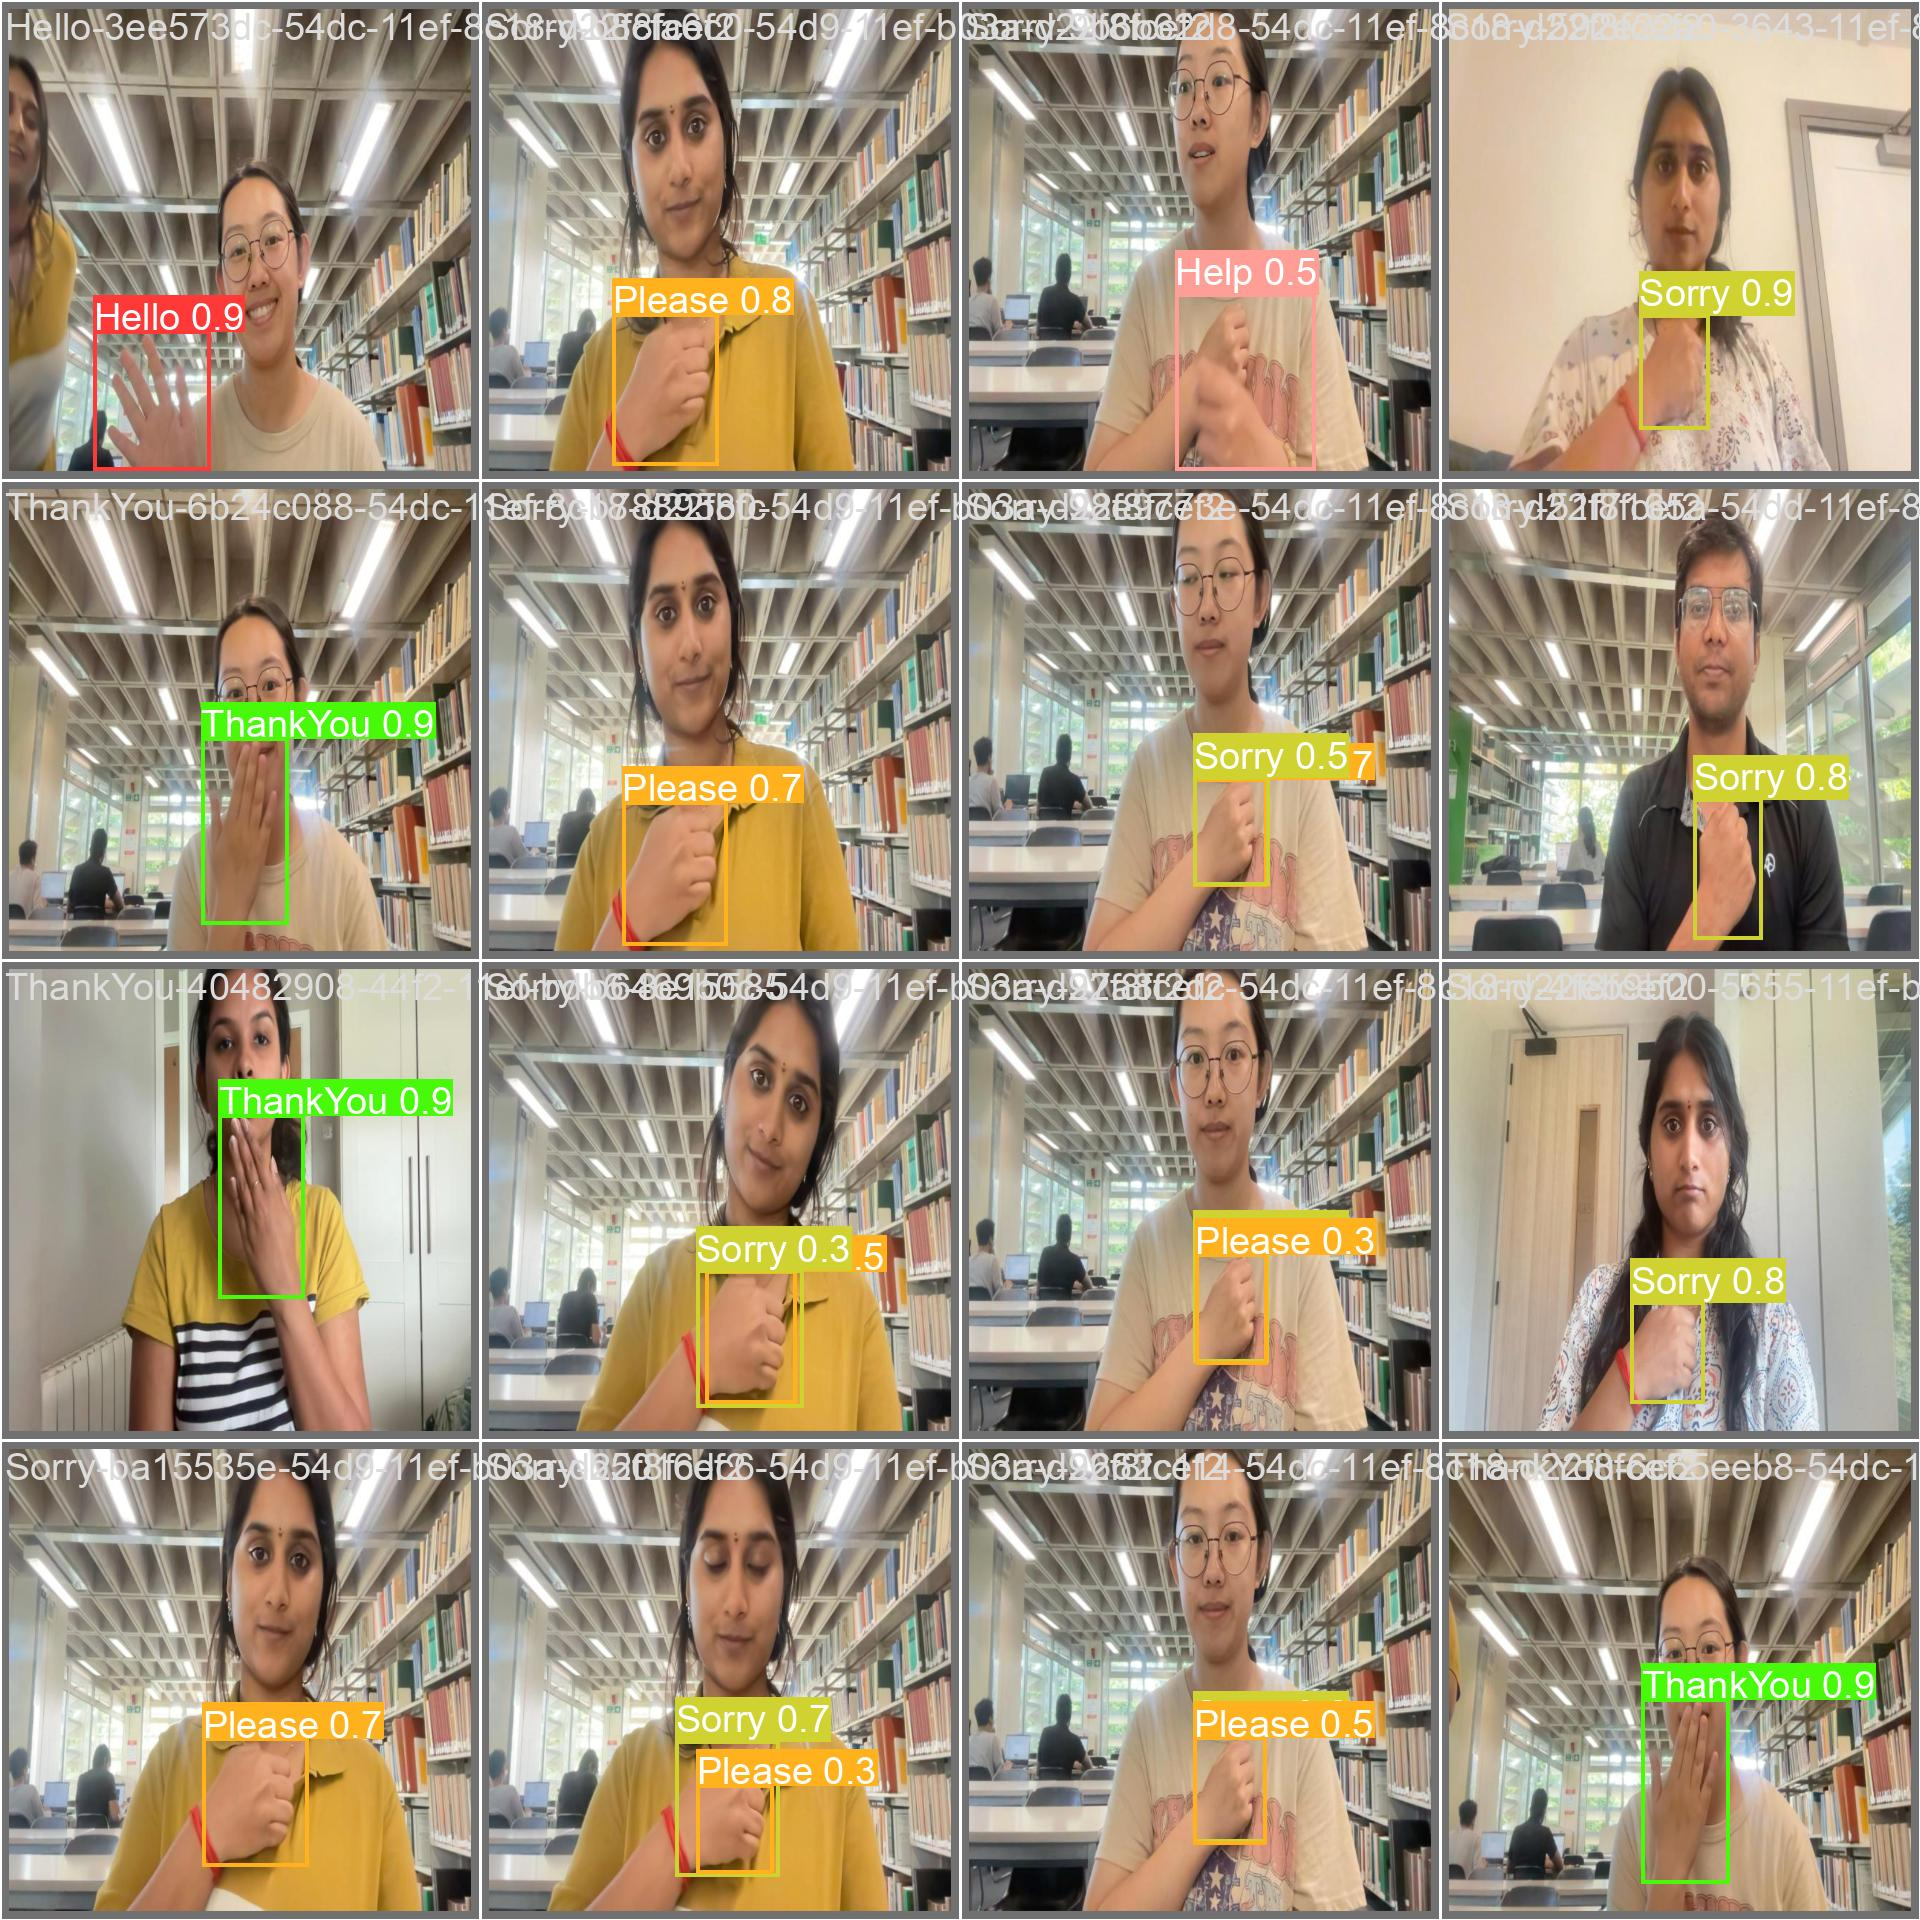

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Step 04: Validation

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/SignLanguage-Final-3/valid/labels.cache... 138 images, 0 backgrounds, 0 corrupt: 100% 138/138 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:06<00:00,  1.44it/s]
                   all        138        138      0.852       0.89      0.946      0.555
                 Hello        138         18      0.897          1      0.981      0.631
                  Help        138         20       0.89          1      0.993      0.669
           PhoneNumber        138         20      0.866        0.9      0.887      0.395
                Please        138         20      0.656       0.75      0.878      0.446
                 Sorry        138         21          1      0.795      0.971      0.477
              ThankYo

### Step 05: Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/25 /content/datasets/SignLanguage-Final-3/test/images/Hello-578af9ac-54dc-11ef-8c18-d22f8fcef282_png.rf.fcf034db6079b6f1225cb9edf0603db4.jpg: 800x800 1 Hello, 23.1ms
image 2/25 /content/datasets/SignLanguage-Final-3/test/images/Hello-6b04fb2a-54d9-11ef-b03a-d22f8fcef282_png.rf.a741ebfacaf86c2909f2c2f9b0985754.jpg: 800x800 1 Hello, 22.6ms
image 3/25 /content/datasets/SignLanguage-Final-3/test/images/Hello-6d91c99a-54d9-11ef-b03a-d22f8fcef282_png.rf.c4a2e07aa13d2bbaa13b1faecafdb5ad.jpg: 800x800 1 Hello, 22.4ms
image 4/25 /content/datasets/SignLanguage-Final-3/test/images/Hello-bd544776-44f0-11ef-bdb6-8e15585c3105_png.rf.3d958dbe54849bc5f92f6ff8a160bf1e.jpg: 800x800 1 Hello, 22.5ms
image 5/25 /content/datasets/SignLanguage-Final-3/test/images/Help-73fe5548-44f1-11

## RESULTS

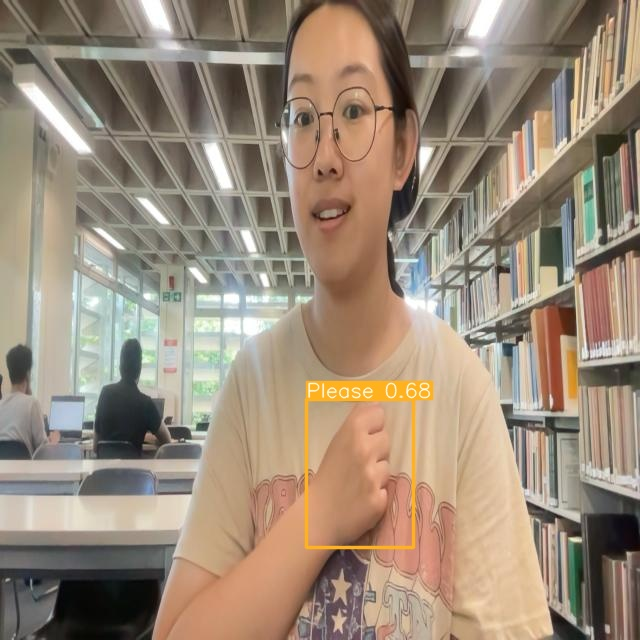

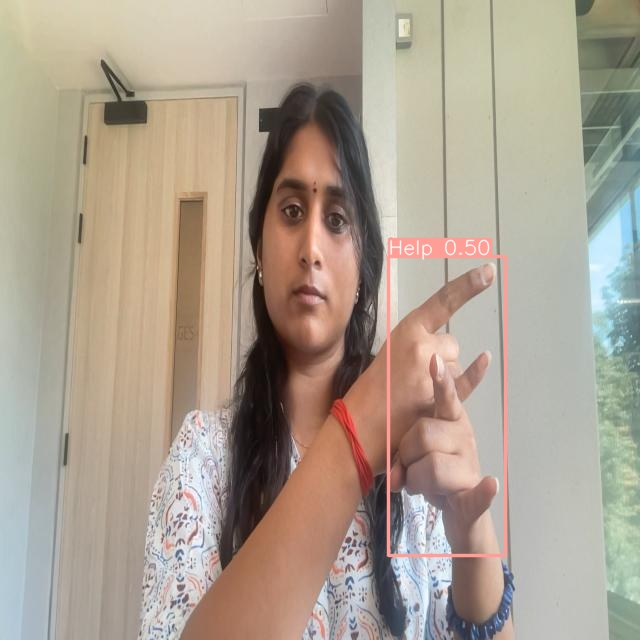

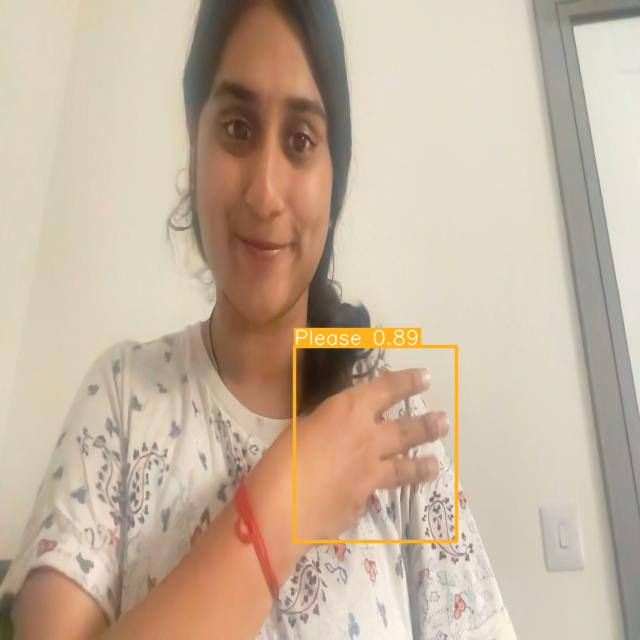

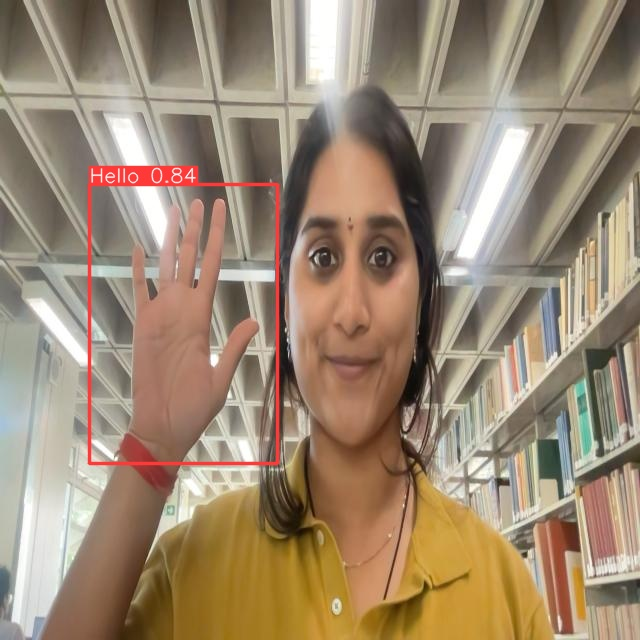

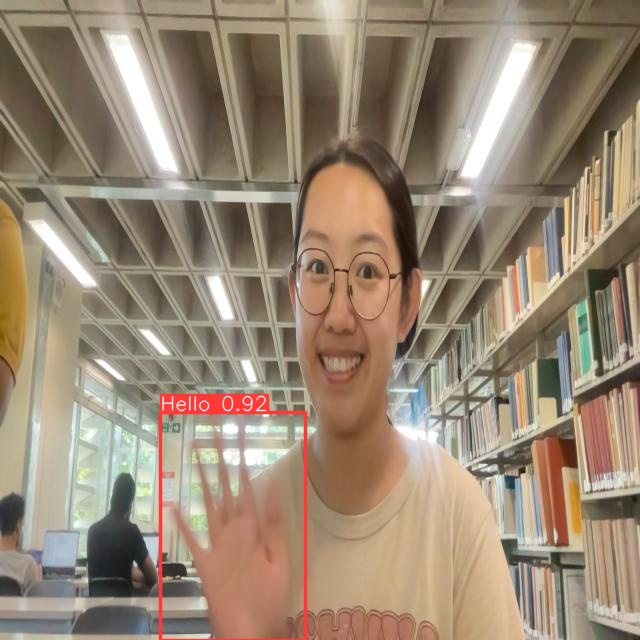

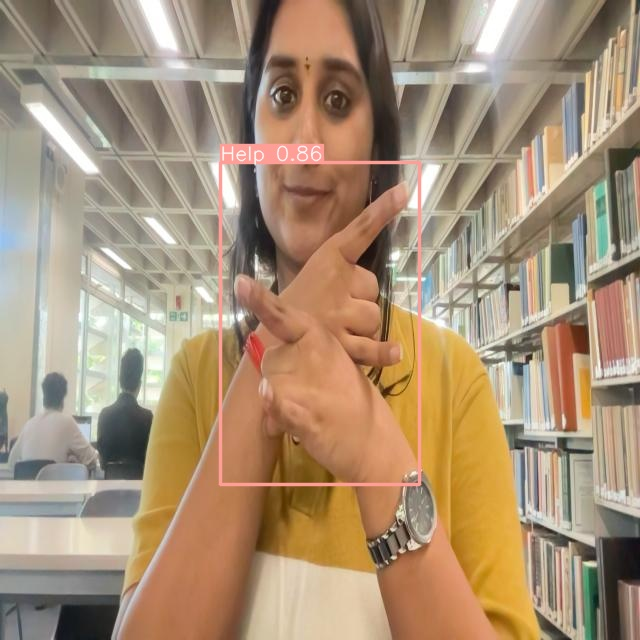

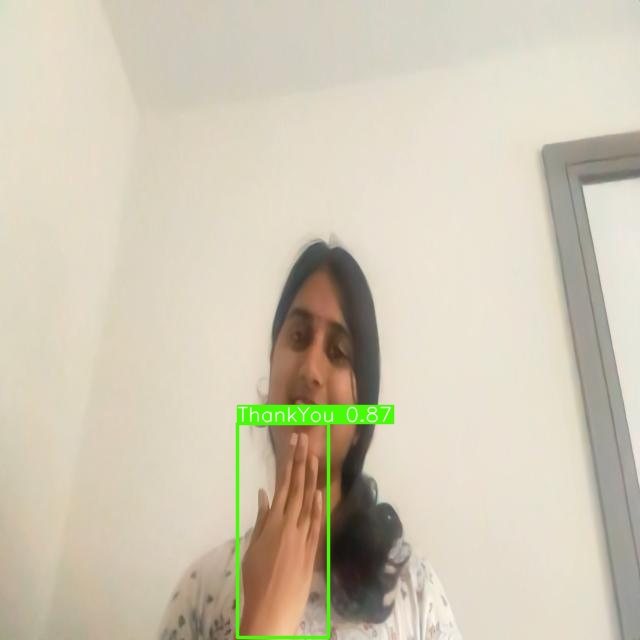

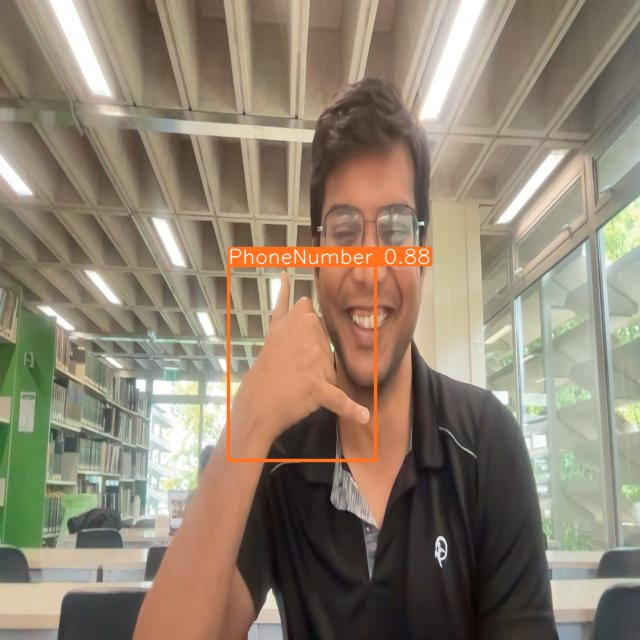

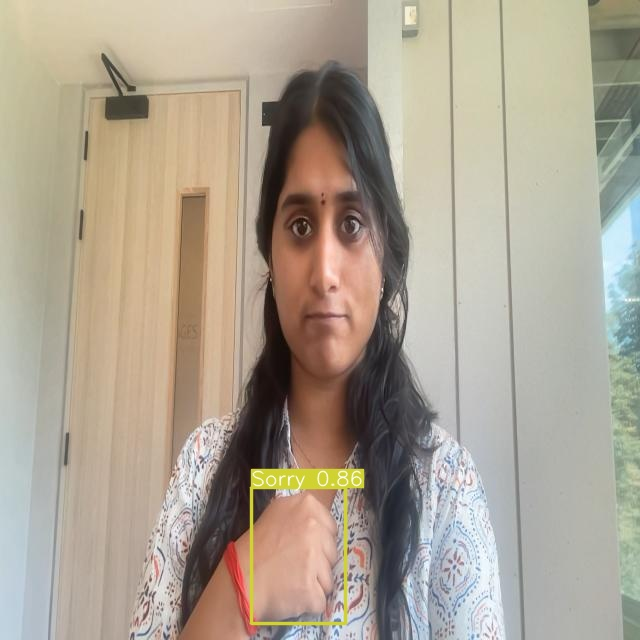

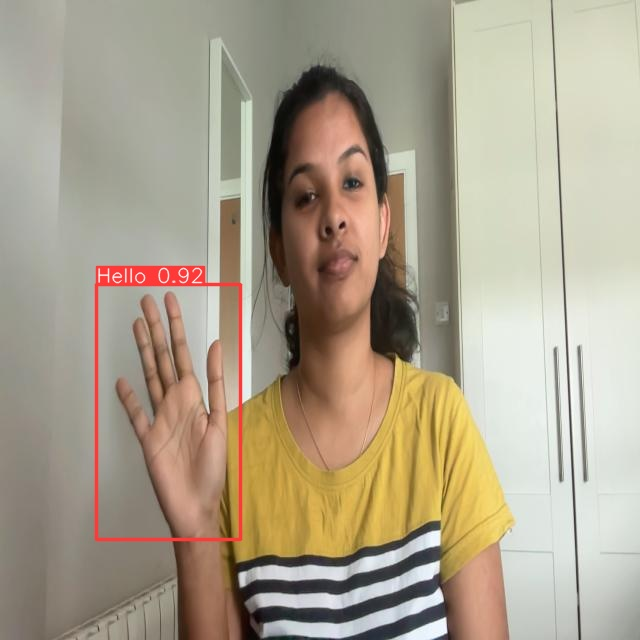

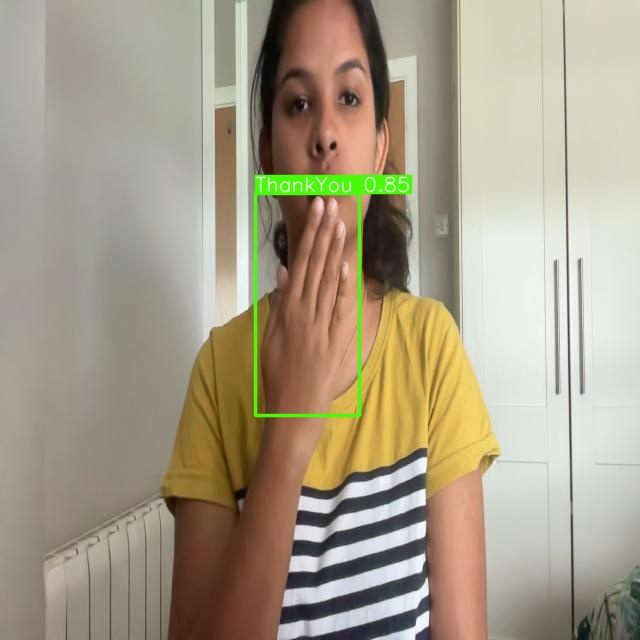

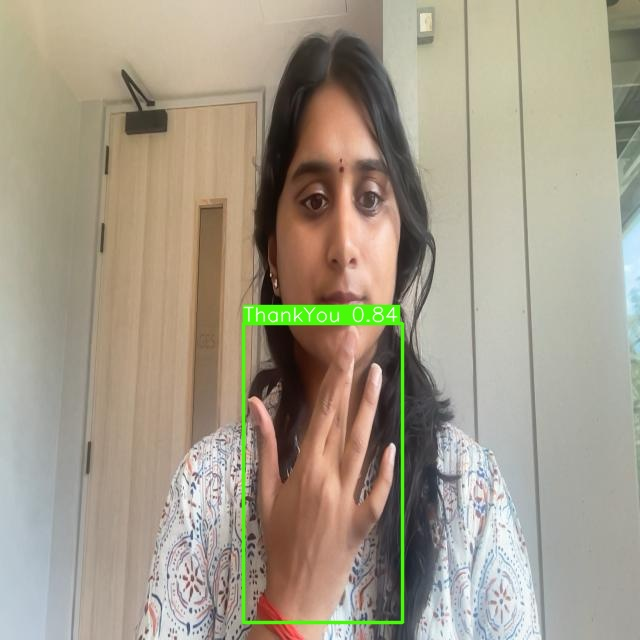

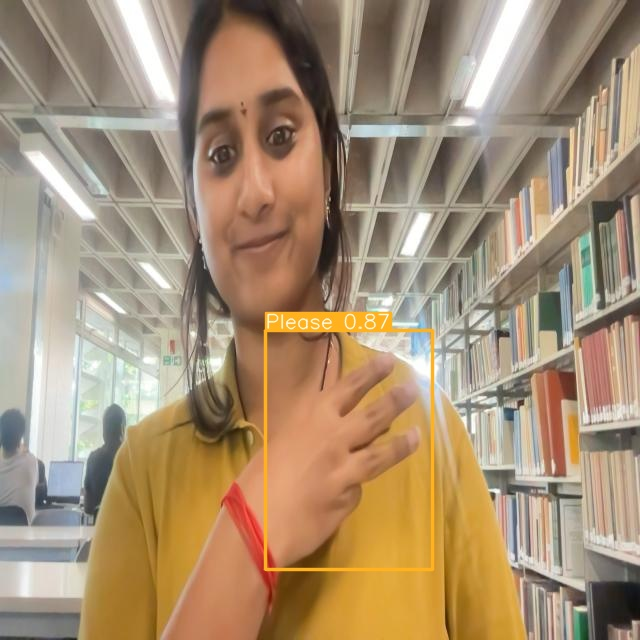

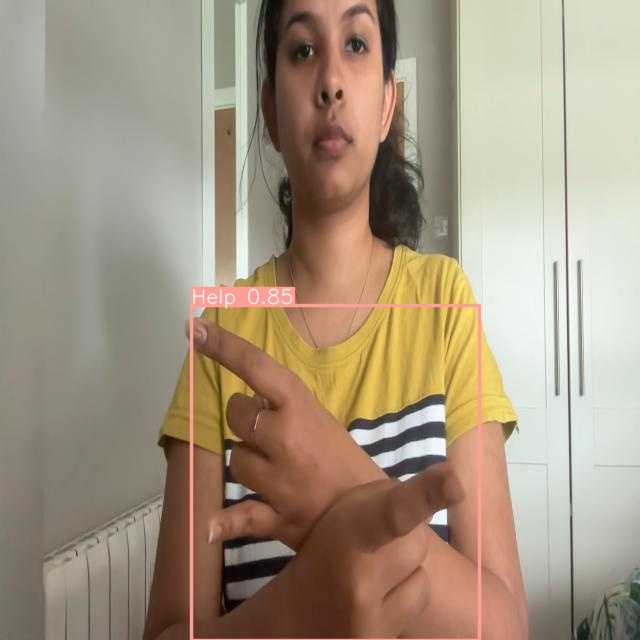

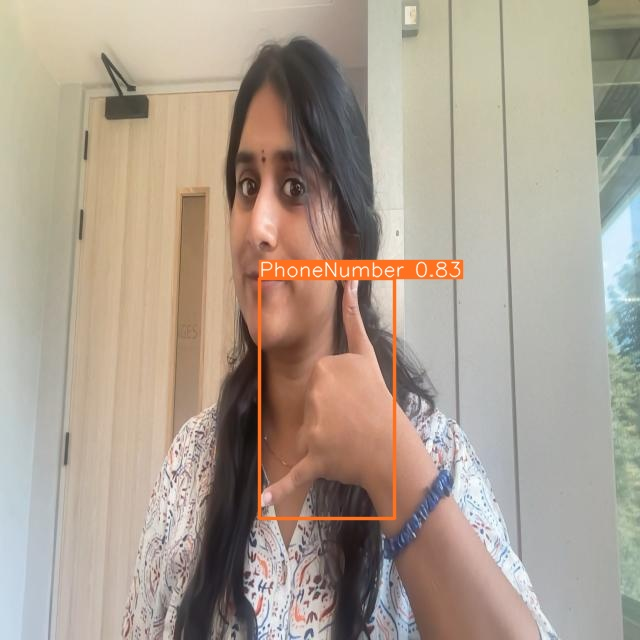

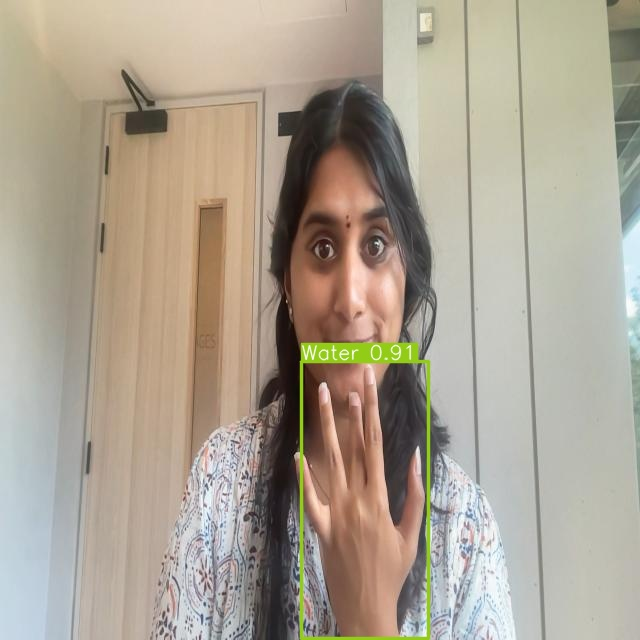

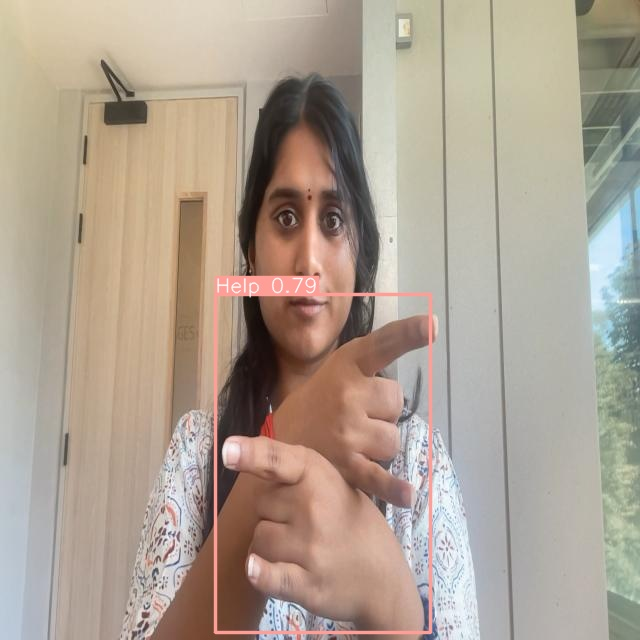

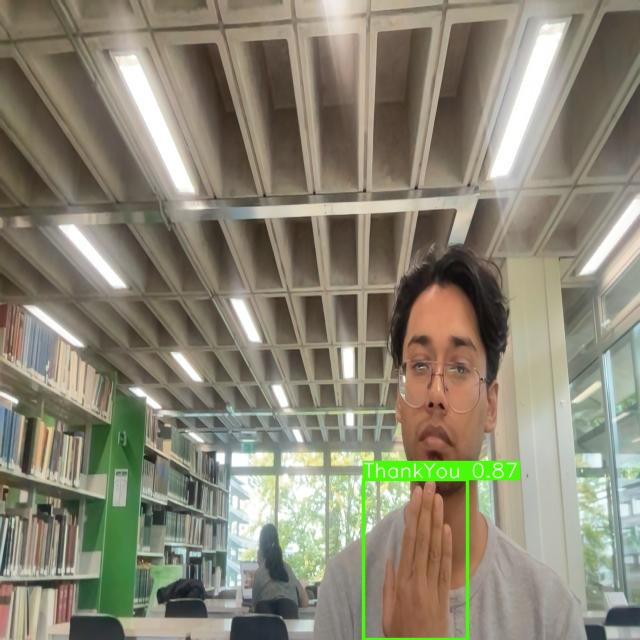

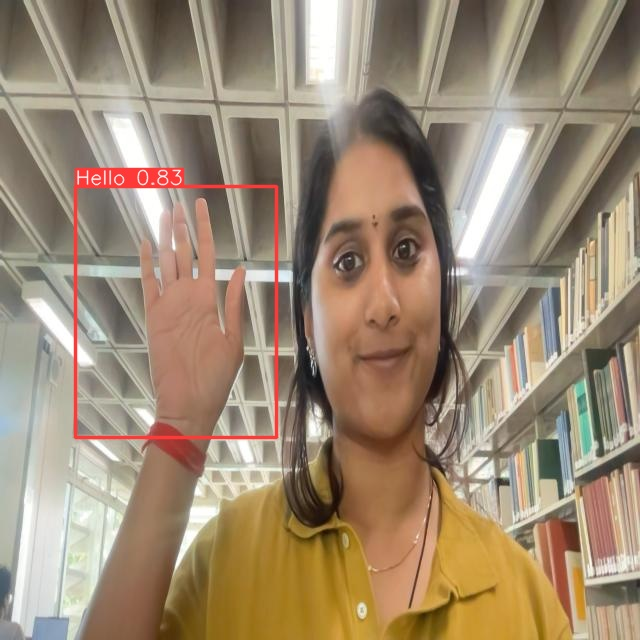

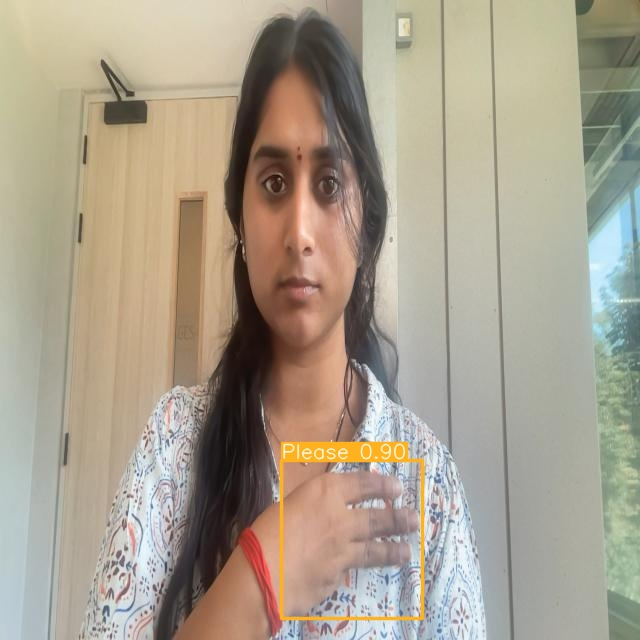

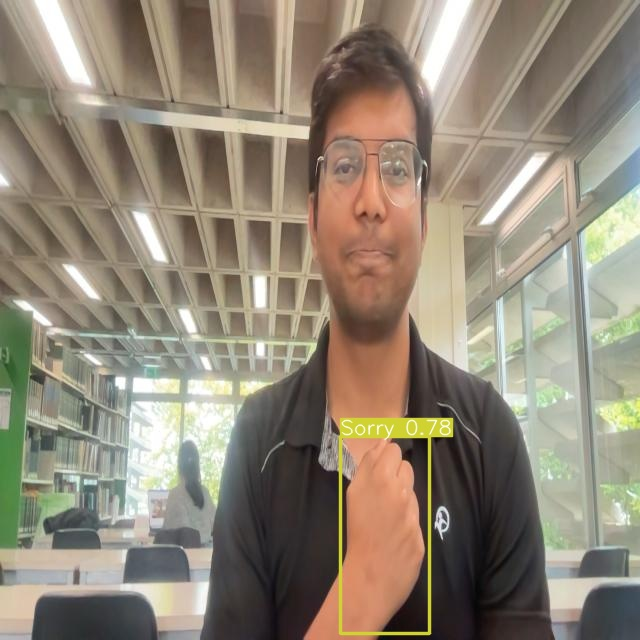

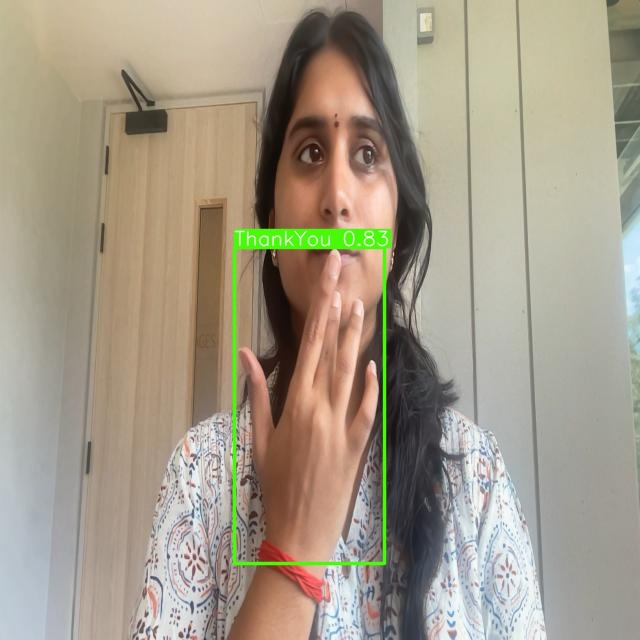

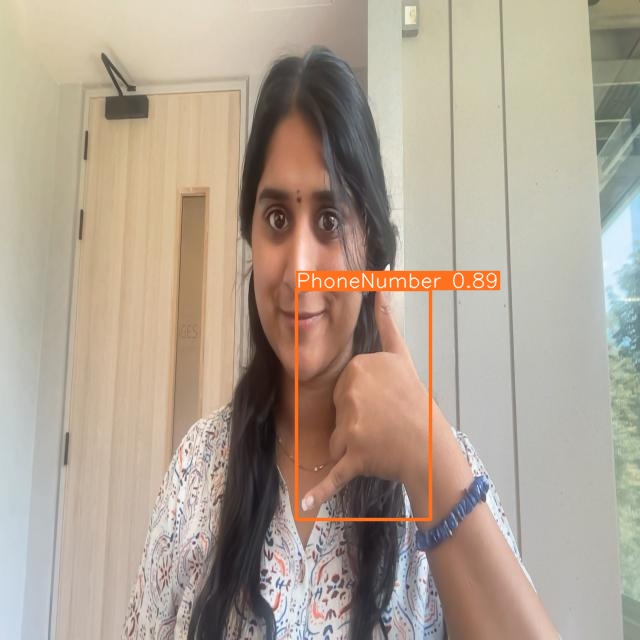

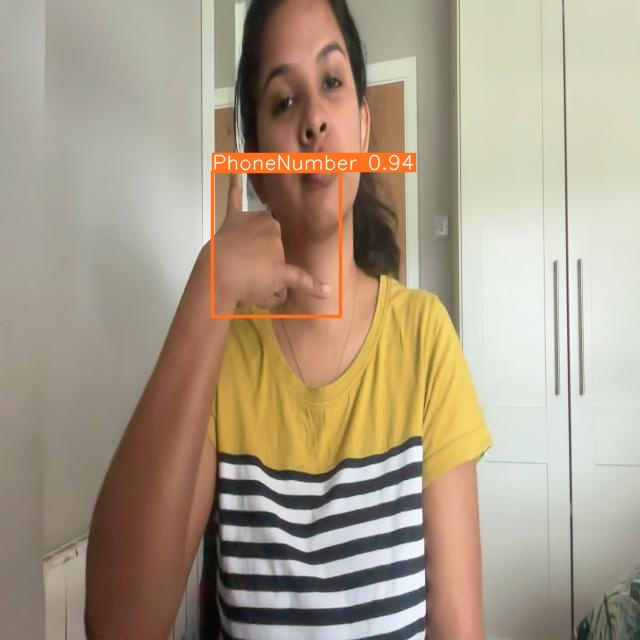

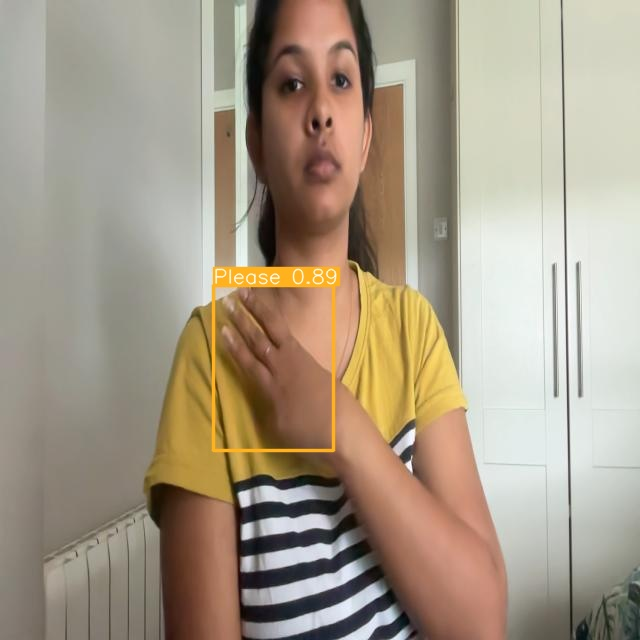

In [17]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:25]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")